![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [116]:
# Import Required Packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [117]:
# Display dataset information
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex
0         -0.903906         0.790360          -1.425342    -0.566948    1
1         -0.830434         0.126187          -1.068577    -0.504847    0
2         -0.683490         0.432728          -0.426399    -1.187953    0
3         -1.344738         1.096901          -0.569105    -0.939551    0
4         -0.867170         1.761074          -0.783164    -0.691149    1


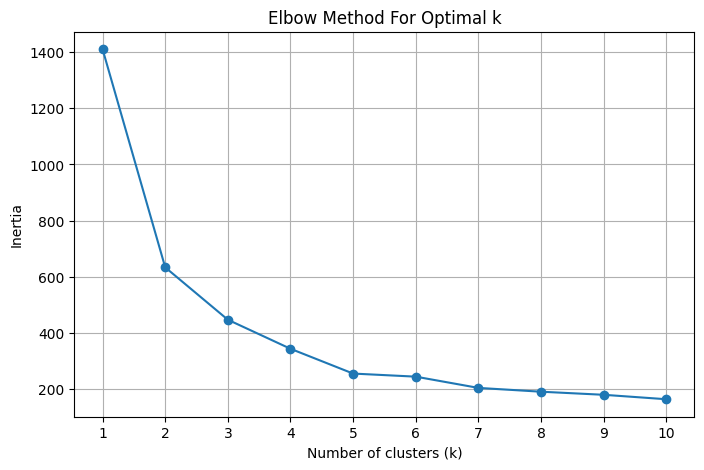

In [118]:
#scale the data
penguins_df["sex"] = penguins_df["sex"].astype("category").cat.codes

scaler = StandardScaler()
penguins_df_scaled = scaler.fit_transform(penguins_df.select_dtypes(include=['float64', 'int64']))
penguins_df_scaled = pd.DataFrame(penguins_df_scaled, columns=penguins_df.select_dtypes(include=['float64', 'int64']).columns)
#add the sex column back to the scaled dataframe
penguins_df_scaled['sex'] = penguins_df['sex']
print(penguins_df_scaled.head())
# Apply KMeans Clustering
inertia_values = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(penguins_df_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

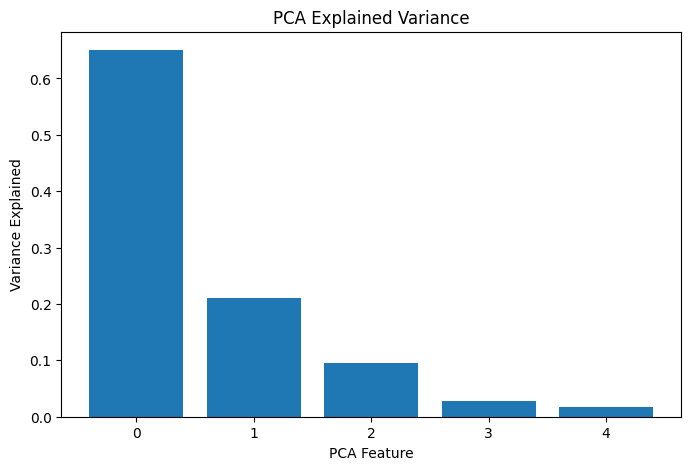

In [119]:
# PCA for feature reduction
from sklearn.decomposition import PCA
pca = PCA()
penguins_pca = pca.fit_transform(penguins_df_scaled)
explained_variance = pca.explained_variance_ratio_
features = range(penguins_df_scaled.shape[1])
plt.figure(figsize=(8, 5))
plt.bar(features, explained_variance, align='center')
plt.xlabel('PCA Feature')
plt.ylabel('Variance Explained')
plt.xticks(features)
plt.title('PCA Explained Variance')
plt.show()

In [120]:
# best value of k is 3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(penguins_df_scaled)
penguins_df['stat_penguins'] = kmeans.labels_
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,stat_penguins
0,39.1,18.7,181.0,3750.0,1,2
1,39.5,17.4,186.0,3800.0,0,2
2,40.3,18.0,195.0,3250.0,0,2
3,36.7,19.3,193.0,3450.0,0,2
4,39.3,20.6,190.0,3650.0,1,2


In [121]:
#find the strongest features
feature_names = penguins_df_scaled.columns
abs_mean_clusters = np.mean(np.abs(kmeans.cluster_centers_), axis=0)
feature_importance = pd.Series(abs_mean_clusters, index=feature_names).sort_values(ascending=False)
print("Feature Importance:\n", feature_importance)

Feature Importance:
 culmen_depth_mm      0.800616
flipper_length_mm    0.784531
culmen_length_mm     0.751134
body_mass_g          0.750728
sex                  0.521727
dtype: float64


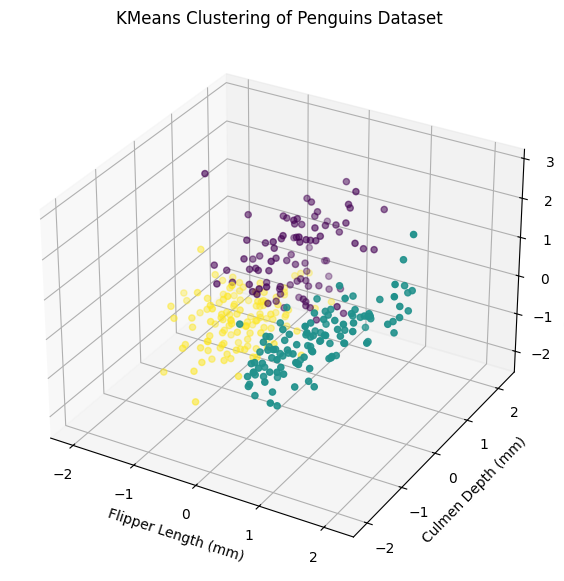

In [122]:
# Visualize the clusters with a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(penguins_df_scaled['flipper_length_mm'], penguins_df_scaled['culmen_depth_mm'], penguins_df_scaled["culmen_length_mm"], c=penguins_df['stat_penguins'], cmap='viridis')
ax.set_xlabel('Flipper Length (mm)')
ax.set_ylabel('Culmen Depth (mm)')
ax.set_zlabel('Culmen Length (mm)')
ax.set_title('KMeans Clustering of Penguins Dataset')
plt.show()